## 二叉树算法及 Graphviz 可视化

1. 递归（前、中、后序）遍历
2. 非递归（前、中、后序）遍历
3. 按层遍历
4. Huffman 树

In [1]:
from graphviz import Digraph
import sys
from uuid import uuid1

class Tree(object):
    """二叉树，定义递归遍历方法
    """
    _visit = lambda node: sys.stdout.write("{} ".format(node.data))
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        
        # _nid as node id 
        self._nid = str(id(self))
    def pre_order_recursive(self, visit=None):
        if not visit:
            visit = type(self)._visit
        if self:
            visit(self)
        if self.left:
            self.left.pre_order_recursive(visit)
        if self.right:
            self.right.pre_order_recursive(visit)
    def in_order_recursive(self, visit=None):
        if not visit:
            visit = type(self)._visit
        if self.left:
            self.left.in_order_recursive(visit)
        if self:
            visit(self)
        if self.right:
            self.right.in_order_recursive(visit)
    def post_order_recursive(self, visit=None):
        if not visit:
            visit = type(self)._visit
        if self.left:
            self.left.post_order_recursive(visit)
        if self.right:
            self.right.post_order_recursive(visit)
        if self:
            visit(self)

### 构建二叉树

In [2]:
def build_tree(lst, leaf="@", klass=Tree):
    """从列表生成树，按照前序遍历的顺序，其中以 leaf 标记为叶子
    """
    if len(lst) == 0:
        return None
    data = lst.pop(0)
    if data == leaf:
        return None
    root = klass(data = data)
    root.left = build_tree(lst, klass=klass)
    root.right = build_tree(lst, klass=klass)
    return root 

In [3]:
inputs = [
        '+',
            '+',
                'a', '@', '@',
                '*',
                    'b', '@', '@',
                    'c', '@', '@',
            '*',
                '+',
                    '*',
                        'd','@','@',
                        'e','@','@',
                    'f', '@', '@',
                'g']
tree = build_tree(inputs[:])
print("In order: ")
tree.in_order_recursive()

In order: 
a + b * c + d * e + f * g 

### 绘制二叉树

In [4]:
class Tree2(Tree):
    def __init__(self, data=None, left=None, right=None):
        super().__init__(data=data, left=left, right=right)
    def draw(self):
        def mk_node(node):
            graph.node(node._nid, str(node.data))
        # 绘制空节点
        def mk_leaf(nid):
            leaf = str(uuid1())
            graph.node(leaf, '@', style='invis')
            graph.edge(nid, leaf, style='invis')
        # 绘制边
        def draw_edges(parent):
            if parent.left:
                graph.edge(parent._nid, parent.left._nid)
                draw_edges(parent.left)
            else:
                mk_leaf(parent._nid)
            if parent.right:
                graph.edge(parent._nid, parent.right._nid)
                draw_edges(parent.right)
            else:
                mk_leaf(parent._nid)
        graph = Digraph(
                      comment="Tree",
                      name="Tree",
                      graph_attr=dict(size='8,8', nodesep='0.5', ranksep='0.5'),
                      node_attr=dict(shape='circle',
                                     style='filled',
                                     color='none',
                                     fontname='Courier',
                                     fontcolor='white',
                                     fontsize='16',
                                     fillcolor='#3A76A7'),
                      edge_attr=dict(color='#3A76A7', arrowsize='0.4'))

        # 通过递归前序遍历创建树的所有节点
        self.pre_order_recursive(mk_node)
        
        draw_edges(self)
        return graph

### 绘制二叉树

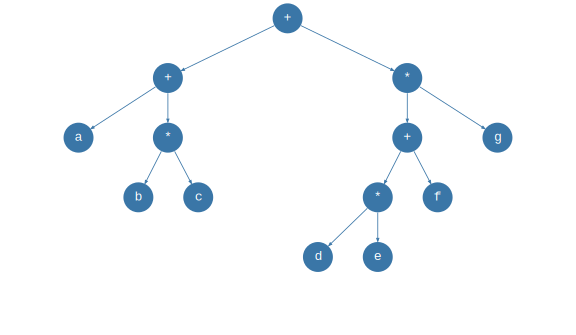

In [5]:
tree = build_tree(inputs[:], klass=Tree2)
graph = tree.draw()
graph

### 递归遍历

1. 前序
2. 中序
3. 后序

In [6]:
def visit(queue):
    return lambda node: queue.append(node)
def draw_edges(root, queue, graph = None, **edge_attr):
    if len(queue) == 0:
        return
    if not graph:
        graph = root.draw()
    root = queue.pop(0)
    
    # hide original edges
    graph.edge_attr['style'] = 'invis'
    step = 0
    while len(queue):
        node = queue.pop(0)
        attr = dict(arrowhead='vee',
                    arrowsize='0.8',
                        style='dashed',
                        color='#F37626',
                        label=' {}'.format(step),
                        constraint="false")
        attr.update(edge_attr)
        graph.edge(root._nid, node._nid, **attr)
        root = node
        step += 1
    return graph

递归前序遍历


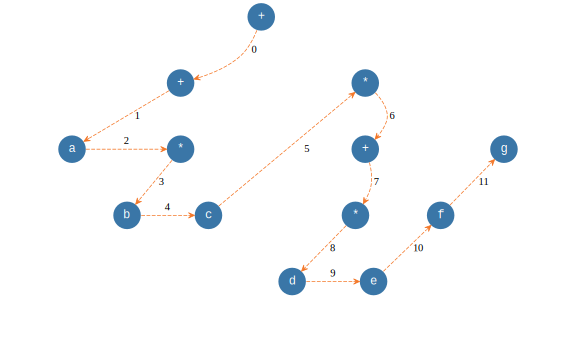

In [7]:
print("递归前序遍历")
queue = []
tree.pre_order_recursive(visit(queue))
pre_order_recursive_graph = draw_edges(tree, queue)
pre_order_recursive_graph 

递归中序遍历


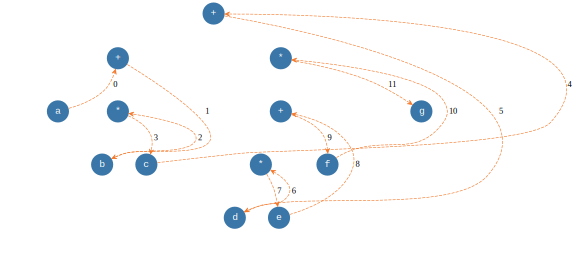

In [8]:
print("递归中序遍历")
queue = []
tree.in_order_recursive(visit(queue))
in_order_recursive_graph = draw_edges(tree, queue)
in_order_recursive_graph

递归后序遍历


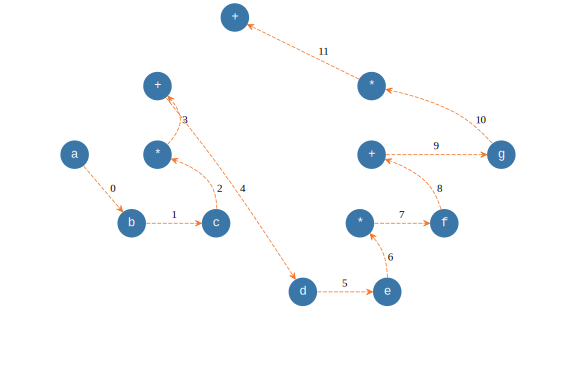

In [9]:
print("递归后序遍历")
queue = []
tree.post_order_recursive(visit(queue))
post_order_recursive_graph = draw_edges(tree, queue)
post_order_recursive_graph

### 非递归遍历

1. 前序
2. 中序
3. 后序

In [10]:
def pre_order_iterative(root, visit=None):
    cursor = root
    stack = [cursor]
    while len(stack):
        while cursor:
            visit(cursor)
            cursor = cursor.left
            stack.append(cursor)
        stack.pop() # pop None
        if len(stack):
            cursor = stack.pop()
            cursor = cursor.right
            stack.append(cursor)

In [11]:
def in_order_iterative(root, visit=None):
    cursor = root
    stack = [cursor]
    while len(stack):
        while cursor:
            cursor = cursor.left
            stack.append(cursor)
        stack.pop()
        if len(stack):
            cursor = stack.pop()
            visit(cursor)
            cursor = cursor.right
            stack.append(cursor)

In [12]:
def post_order_iterative(root, visit=None):
    cursor = root
    last   = None
    stack  = [cursor]
    while len(stack):
        while cursor and cursor is not last:
            last   = cursor
            cursor = cursor.left
            stack.append(cursor)
        stack.pop()
        if len(stack):
            cursor = stack[-1]
            if cursor.right is None or cursor.right is last:
                visit(cursor)
                last = cursor
            else:
                last = cursor
                cursor = cursor.right
                stack.append(cursor)

非递归前序遍历


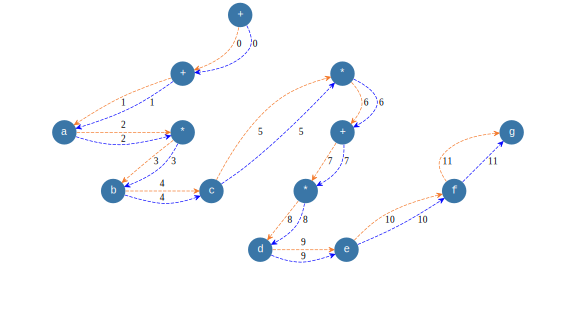

In [13]:
print("非递归前序遍历")
queue = []
pre_order_iterative(tree, visit(queue))
graph = draw_edges(tree, queue, pre_order_recursive_graph, color='blue')
graph

非递归中序遍历


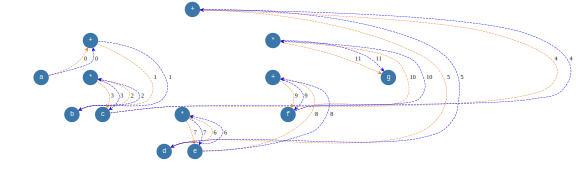

In [14]:
print("非递归中序遍历")
queue = []
in_order_iterative(tree, visit(queue))
graph = draw_edges(tree, queue, in_order_recursive_graph, color='blue')
graph

非递归后序遍历


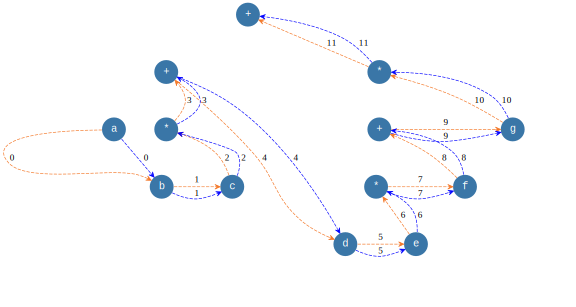

In [15]:
print("非递归后序遍历")
queue = []
post_order_iterative(tree, visit(queue))
graph = draw_edges(tree, queue, post_order_recursive_graph, color='blue')
graph

### 按层遍历

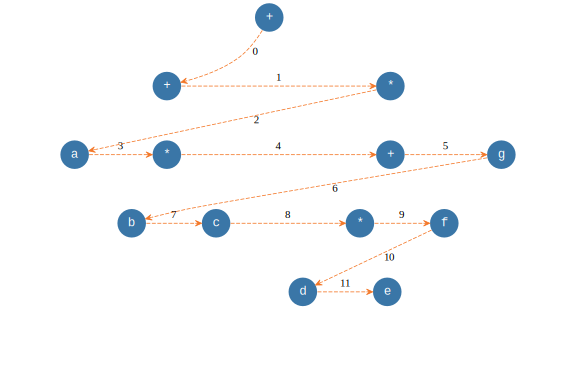

In [16]:
def level_traversal(root, visit):
    queue = [root]
    while len(queue):
        cursor = queue.pop(0)
        visit(cursor)
        if cursor.left:
            queue.append(cursor.left)
        if cursor.right:
            queue.append(cursor.right)

queue = []
level_traversal(tree, visit(queue))
graph = draw_edges(tree, queue)
graph

### 哈夫曼树

In [17]:
class _HuffmanTree(object):
    def __init__(self, index=0, char=' ', weight=0, parent=0, left=0, right=0):
        self.index  = index
        self.char   = char
        self.weight = weight
        self.parent = parent
        self.left   = left
        self.right  = right
    def __str__(self):
        return "{}\t{}\t{}\t{}\t{}\t{}".format(self.index,
                                             self.char,
                                             self.weight,
                                             self.parent,
                                             self.left,
                                             self.right)

In [22]:
class HuffmanTree():
    def __init__(self, codes):
        self._tree = []
        self.codes = codes
        self.n_codes = len(codes)
        self.keys = codes.keys()
        self.huffman_tree = {}
        
        self.build_tree()
    def build_tree(self):
        def _select(n):
            tmp = list(filter(lambda x: x.parent == 0, self._tree[1:n+1]))
            tmp = sorted(tmp, key=lambda t: t.weight)
            return tmp[0].index, tmp[1].index
        for i in range(self.n_codes*2):
            self._tree.append(_HuffmanTree(index = i))
        for i, k in enumerate(self.codes):
            self._tree[i+1].char = k
            self._tree[i+1].weight = self.codes[k]
        for i in range(self.n_codes+1, len(self._tree)):
            s1, s2 = _select(i-1)
            self._tree[s1].parent, self._tree[s2].parent = i, i
            self._tree[i].left, self._tree[i].right = s1, s2
            self._tree[i].weight = self._tree[s1].weight + self._tree[s2].weight
        # 制作编码表
        def _update_hash(i, parent):
            _hf = self._tree[i]
            _pa = self._tree[parent]
            char = _hf.char
            b = '1'
            if _pa.left == _hf.index:
                b = '0'
            if not self.huffman_tree.get(char):
                self.huffman_tree[char] = b
            else:
                self.huffman_tree[char] = b + self.huffman_tree[char]
        for i in range(1, self.n_codes+1):
            parent = self._tree[i].parent
            while parent:
                _update_hash(i, parent)
                parent = self._tree[parent].parent
    def _encode(self, char):
        return self.huffman_tree[char]
    def encode(self, string):
        res = ''.join(map(self._encode, string))
        return res
    def decode(self, code):
        res = ''
        i = 0
        while i < len(code):
            parent = self._tree[-1]
            while parent.left:
                char = code[i]
                if char == '0':
                    parent = self._tree[parent.left]
                else:
                    parent = self._tree[parent.right]
                i += 1
            res += parent.char
        return res
    def draw(self):
        graph = Digraph(name="HuffmanTree",
                        graph_attr=dict(size='8,4'),
                        node_attr=dict(shape='circle',
                                       style='filled',
                                       color='none',
                                       fontname='Courier',
                                       fontcolor='white',
                                       fontsize='16',
                                       fillcolor='#3A76A7'),
                        edge_attr=dict(arrowsize='0.5',
                                      color='#3A76A7',
                                      fontname='Courier'))
        for i, t in enumerate(self._tree[1:]):
            node_label = "{}:{}".format(t.char, t.weight) if t.char != ' ' else ''
            graph.node(str(t.index), node_label)
            if t.parent:
                b = ' 1'
                if self._tree[t.parent].left == t.index:
                    b = ' 0'
                graph.edge(str(self._tree[t.parent].index), str(t.index), label = b)
        return graph
                

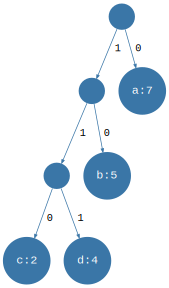

In [23]:
codes = {'a': 7, 'b': 5, 'c': 2, 'd': 4}
HT = HuffmanTree(codes)
graph = HT.draw()
graph

In [24]:
print("{}\t{}\t{}\t{}\t{}\t{}".format("Index", "Char", "Parent", "Weight", "Left", "Right"))
for t in HT._tree[1:]:
    print(t)

Index	Char	Parent	Weight	Left	Right
1	c	2	5	0	0
2	b	5	6	0	0
3	a	7	7	0	0
4	d	4	5	0	0
5	 	6	6	1	4
6	 	11	7	2	5
7	 	18	0	3	6


In [25]:
print(HT.huffman_tree)
print(list(map(HT.decode, ['111', '0', '10', '110'])))
encoded = HT.encode('abcdbca')
print(encoded)
print(HT.decode(encoded))

{'c': '110', 'b': '10', 'a': '0', 'd': '111'}
['d', 'a', 'b', 'c']
010110111101100
abcdbca


# Thanks

by [@Yushneng](https://github.com/rainyear)

[Source code](https://github.com/rainyear/nb/blob/gh-pages/Binary-Tree.ipynb)

![PyHub](https://segmentfault.com/image?src=http://upload-images.jianshu.io/upload_images/21342-86881f56ca5e36e2.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240&objectId=1190000004905072&token=1eade17c84ca343910d56e942a81572f)